# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


import os
path = os.getcwd()

In [2]:
train = pd.read_csv(path+"\\train.csv")
test = pd.read_csv(path+"\\test.csv")
sample_sub = pd.read_csv(path+"\\sample_submission.csv")

---
## Merging Data

In [3]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)
df.shape

(219057, 14)

---
# Data Cleaning

**Merging 'Destination_Type' M and N in L**

In [4]:
df['Destination_Type'] = df['Destination_Type'].apply(lambda x : 'L' if x in ['N', 'M'] else x)

**Merging Cancellation_Last_1Month 6, 7, 8 in 5**

In [5]:
df['Cancellation_Last_1Month'] = df['Cancellation_Last_1Month'].apply(lambda x : 5 if x in [ 6, 7, 8] else x)

**Filling Missing Values**

In [6]:
df.fillna(-999, inplace = True)

---
# Data Preprocessing

### Feature Encoding

In [7]:
df = pd.get_dummies(data = df, columns=['Type_of_Cab','Destination_Type'], drop_first=True)

In [8]:
df['Confidence_Life_Style_Index'].replace({'A':3, 'B':2, 'C': 1}, inplace = True)
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

### Changing Datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219057 entries, 0 to 219056
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Customer_Since_Months        219057 non-null  float64
 3   Life_Style_Index             219057 non-null  float64
 4   Confidence_Life_Style_Index  219057 non-null  int64  
 5   Customer_Rating              219057 non-null  float64
 6   Cancellation_Last_1Month     219057 non-null  int64  
 7   Var1                         219057 non-null  float64
 8   Var2                         219057 non-null  int64  
 9   Var3                         219057 non-null  int64  
 10  Gender                       219057 non-null  int64  
 11  Surge_Pricing_Type           219057 non-null  float64
 12  Type_of_Cab_A                219057 non-null  uint8  
 13 

In [10]:
df['Trip_Distance'] = df['Trip_Distance'].astype('float16')
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype('int8')
df['Life_Style_Index'] = df['Life_Style_Index'].astype('float16')
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].astype('int16')
df['Customer_Rating'] = df['Customer_Rating'].astype('float16')
df['Var1'] = df['Var1'].astype('int16')
df['Var2'] = df['Var2'].astype('uint8')
df['Var3'] = df['Var3'].astype('uint8')
df['Surge_Pricing_Type'] = df['Surge_Pricing_Type'].astype('uint8')

---
# Spliting Dataset

In [11]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)



In [12]:
target = 'Surge_Pricing_Type'
id_col = 'Trip_ID'

features = [col for col in df.columns if col not in ([target, id_col])]

In [13]:
trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 1999, stratify = train_proc[target])

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test_proc[features]


---
# Basic Model Building

In [14]:
models = {
    'Logistic_Regression' : LogisticRegression(max_iter = 500),
    'Decision_Tree' : DecisionTreeClassifier(random_state = 1999),
    'Random_Forest' : RandomForestClassifier(random_state = 1999),
    'Adaboost' : AdaBoostClassifier(random_state = 1999),
    'XGBoost' : XGBClassifier(random_state = 1999),
    'LGBoost' : LGBMClassifier(random_state = 1999),
    'Catboost' : CatBoostClassifier(random_state = 1999)
}

In [15]:
def run_models(model_dictionary):
    for name, model in model_dictionary.items():
        print(f'================{name}================')
        if name == 'Catboost':
            model.fit(X_trn, y_trn, verbose = False)
        else:
            model.fit(X_trn, y_trn)
        preds = model.predict(X_val)
        accuracy = accuracy_score(y_val, preds)
        print(f'{name} Accuracy : {accuracy}')
        print()
        print()
    return

In [16]:
%%time
run_models(models)

================Logistic_Regression================


C:\Users\sunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic_Regression Accuracy : 0.6556032354839935


================Decision_Tree================
Decision_Tree Accuracy : 0.577981999772149


================Random_Forest================
Random_Forest Accuracy : 0.6944138533399157


================Adaboost================
Adaboost Accuracy : 0.6906922872441423


================XGBoost================
XGBoost Accuracy : 0.703262066608438


================LGBoost================
LGBoost Accuracy : 0.7038316940720769


================Catboost================
Catboost Accuracy : 0.705464626134508


Wall time: 1min 32s


In [17]:
%%time
#model = CatBoostClassifier(random_state=1999)

#model.fit(X_trn, y_trn, verbose = False)
#preds = model.predict(X_val)
#accuracy =  accuracy_score(y_val, preds)
#print(f'Accuracy is: {accuracy}')

#test_preds = model.predict(X_test)
#sample_sub[target] = test_preds
sample_sub.to_csv(path+'\\baseline_model_preds.csv')

Wall time: 127 ms


In [234]:
sample_sub.to_csv(path+'\\baseline_model_preds.csv', index = False)

In [18]:
%%time
model = LGBMClassifier(random_state = 1999)

model.fit(X_trn, y_trn)
preds = model.predict(X_val)
accuracy =  accuracy_score(y_val, preds)
print(f'Accuracy is: {accuracy}')

test_preds = model.predict(X_test)
sample_sub[target] = test_preds
sample_sub.to_csv(path+'\\baseline_model_preds.csv', index = False)

Accuracy is: 0.7038316940720769
Wall time: 2.84 s


In [209]:
def cross_val(features, train, test, clf, name):
    N_splits = 5
    
    ## Aggregating Predictions Prerequsities
    preds_df = pd.DataFrame()
    ####
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    
    feature_importance = pd.DataFrame()
    
    target_col = train[target]
    
    feature_importance_list = 0
    
    folds = StratifiedKFold(n_splits = N_splits, shuffle = True, random_state = 1999)
    stratified_target = pd.qcut(target_col, 10, labels=False, duplicates='drop')
    
    for index, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
        print()
        print(f'*************************Fold {index+1}*************************')
        
        ## Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        ## Validation Set
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        ## Test Set
        X_test = test[features]
        
        
        ## Model Training
        _ = clf.fit(X_trn, y_trn)
        
        ## Predicting
        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)
        
        accuracy = accuracy_score(y_val, val_preds)
        print()
        print(f'Accuracy is: {accuracy}')
        
        if name == 'cat':
            a = pd.DataFrame(val_preds)
            b = a[0]
            oofs[val_idx] = b
            
            a = pd.DataFrame(test_preds)
            b = a[0]
            preds_df[str(index+1)] = b
        else:
            oofs[val_idx] = val_preds
            #preds += test_preds
            preds_df[str(index+1)] = test_preds
        
        feature_importance_list +=  clf.feature_importances_
    total_accuracy = accuracy_score(target_col, oofs)
    print()
    print(f'Accuracy is: {total_accuracy}')
    
    feature_importance['Features'] = features
    feature_importance['Importances'] = feature_importance_list/5
    
    ## Aggregating Predictions
    preds_df['Mode'] = preds_df.apply(lambda x: x.mode()[0], axis = 1)
    preds = preds_df['Mode']
    return oofs, preds, feature_importance

---
# Feature Engineering

### Missing Value Imputation

In [199]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)
df.shape

(219057, 14)

In [200]:
df['Type_of_Cab'].fillna('F', inplace = True)
df['Customer_Since_Months'].fillna(10, inplace = True)
mean_life = df['Life_Style_Index'].mean()
df['Life_Style_Index'].fillna(mean_life, inplace = True)
df['Confidence_Life_Style_Index'].fillna('D', inplace = True)
mean_var1 = df['Var1'].mean()
df['Var1'].fillna(mean_var1, inplace = True)

In [201]:
df.fillna(-999, inplace = True)

**1.Mean distance per cab_price**

In [202]:
#df['mean_cab_distance'] = df['Trip_Distance']/df.groupby('Type_of_Cab')['Trip_Distance'].transform('mean')
#df['mean_confidence_distance'] = df['Trip_Distance']/df.groupby('Confidence_Life_Style_Index')['Trip_Distance'].transform('mean')

In [203]:
# Encoding
df = pd.get_dummies(data = df, columns=['Type_of_Cab','Destination_Type'], drop_first=True)
df['Confidence_Life_Style_Index'].replace({'A':3, 'B':2, 'C': 1, 'D': 0}, inplace = True)
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)

# Data type Changing
df['Trip_Distance'] = df['Trip_Distance'].astype('float16')
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype('int8')
df['Life_Style_Index'] = df['Life_Style_Index'].astype('float16')
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].astype('int16')
df['Customer_Rating'] = df['Customer_Rating'].astype('float16')
df['Var1'] = df['Var1'].astype('int16')
df['Var2'] = df['Var2'].astype('uint8')
df['Var3'] = df['Var3'].astype('uint8')
df['Surge_Pricing_Type'] = df['Surge_Pricing_Type'].astype('uint8')

In [204]:
def concat_helper(train_, test_):
    df = pd.concat([train_, test_], axis = 0).reset_index(drop=True)
    return df

In [205]:
def helper(df):
    train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
    features = [col for col in df.columns if col not in ([target, id_col])]
    
    return train_proc, test_proc, features

In [206]:
train_proc, test_proc, features = helper(df)

In [189]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)

target = 'Surge_Pricing_Type'
id_col = 'Trip_ID'

features = [col for col in df.columns if col not in ([target, id_col])]

trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 1999, stratify = train_proc[target])

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test_proc[features]



*************************Fold 1*************************
Learning rate set to 0.10034
0:	learn: 1.0368904	total: 26.2ms	remaining: 26.2s
1:	learn: 0.9891587	total: 50.3ms	remaining: 25.1s
2:	learn: 0.9506718	total: 78.7ms	remaining: 26.2s
3:	learn: 0.9195404	total: 108ms	remaining: 26.9s
4:	learn: 0.8943362	total: 138ms	remaining: 27.5s
5:	learn: 0.8730580	total: 163ms	remaining: 27.1s
6:	learn: 0.8554319	total: 190ms	remaining: 26.9s
7:	learn: 0.8414788	total: 221ms	remaining: 27.4s
8:	learn: 0.8284982	total: 250ms	remaining: 27.6s
9:	learn: 0.8174668	total: 273ms	remaining: 27s
10:	learn: 0.8080612	total: 300ms	remaining: 26.9s
11:	learn: 0.8002216	total: 329ms	remaining: 27.1s
12:	learn: 0.7931683	total: 362ms	remaining: 27.5s
13:	learn: 0.7871579	total: 383ms	remaining: 27s
14:	learn: 0.7815100	total: 414ms	remaining: 27.2s
15:	learn: 0.7770155	total: 444ms	remaining: 27.3s
16:	learn: 0.7724310	total: 476ms	remaining: 27.5s
17:	learn: 0.7686988	total: 501ms	remaining: 27.3s
18:	le

159:	learn: 0.6876722	total: 4.25s	remaining: 22.3s
160:	learn: 0.6875521	total: 4.29s	remaining: 22.3s
161:	learn: 0.6873769	total: 4.32s	remaining: 22.4s
162:	learn: 0.6872812	total: 4.36s	remaining: 22.4s
163:	learn: 0.6871564	total: 4.39s	remaining: 22.4s
164:	learn: 0.6869970	total: 4.42s	remaining: 22.3s
165:	learn: 0.6868740	total: 4.44s	remaining: 22.3s
166:	learn: 0.6867677	total: 4.48s	remaining: 22.3s
167:	learn: 0.6866554	total: 4.51s	remaining: 22.3s
168:	learn: 0.6865499	total: 4.53s	remaining: 22.3s
169:	learn: 0.6864362	total: 4.57s	remaining: 22.3s
170:	learn: 0.6863422	total: 4.6s	remaining: 22.3s
171:	learn: 0.6862170	total: 4.63s	remaining: 22.3s
172:	learn: 0.6861364	total: 4.66s	remaining: 22.3s
173:	learn: 0.6860267	total: 4.69s	remaining: 22.3s
174:	learn: 0.6859086	total: 4.72s	remaining: 22.2s
175:	learn: 0.6858395	total: 4.74s	remaining: 22.2s
176:	learn: 0.6857573	total: 4.77s	remaining: 22.2s
177:	learn: 0.6856621	total: 4.8s	remaining: 22.1s
178:	learn: 0.

318:	learn: 0.6732047	total: 8.34s	remaining: 17.8s
319:	learn: 0.6731490	total: 8.38s	remaining: 17.8s
320:	learn: 0.6730572	total: 8.41s	remaining: 17.8s
321:	learn: 0.6729976	total: 8.44s	remaining: 17.8s
322:	learn: 0.6729355	total: 8.47s	remaining: 17.7s
323:	learn: 0.6728744	total: 8.49s	remaining: 17.7s
324:	learn: 0.6728261	total: 8.52s	remaining: 17.7s
325:	learn: 0.6727678	total: 8.55s	remaining: 17.7s
326:	learn: 0.6727060	total: 8.58s	remaining: 17.7s
327:	learn: 0.6726508	total: 8.6s	remaining: 17.6s
328:	learn: 0.6726029	total: 8.63s	remaining: 17.6s
329:	learn: 0.6725381	total: 8.66s	remaining: 17.6s
330:	learn: 0.6724841	total: 8.69s	remaining: 17.6s
331:	learn: 0.6723845	total: 8.72s	remaining: 17.5s
332:	learn: 0.6723066	total: 8.74s	remaining: 17.5s
333:	learn: 0.6722553	total: 8.77s	remaining: 17.5s
334:	learn: 0.6721710	total: 8.79s	remaining: 17.5s
335:	learn: 0.6721029	total: 8.82s	remaining: 17.4s
336:	learn: 0.6720141	total: 8.85s	remaining: 17.4s
337:	learn: 0

477:	learn: 0.6634575	total: 13.2s	remaining: 14.4s
478:	learn: 0.6633907	total: 13.2s	remaining: 14.4s
479:	learn: 0.6633399	total: 13.2s	remaining: 14.3s
480:	learn: 0.6632795	total: 13.3s	remaining: 14.3s
481:	learn: 0.6631959	total: 13.3s	remaining: 14.3s
482:	learn: 0.6631571	total: 13.3s	remaining: 14.3s
483:	learn: 0.6631018	total: 13.4s	remaining: 14.3s
484:	learn: 0.6630449	total: 13.4s	remaining: 14.2s
485:	learn: 0.6630126	total: 13.4s	remaining: 14.2s
486:	learn: 0.6629418	total: 13.5s	remaining: 14.2s
487:	learn: 0.6628989	total: 13.5s	remaining: 14.2s
488:	learn: 0.6628095	total: 13.5s	remaining: 14.1s
489:	learn: 0.6627523	total: 13.6s	remaining: 14.1s
490:	learn: 0.6627072	total: 13.6s	remaining: 14.1s
491:	learn: 0.6626802	total: 13.6s	remaining: 14.1s
492:	learn: 0.6626368	total: 13.7s	remaining: 14.1s
493:	learn: 0.6625793	total: 13.7s	remaining: 14s
494:	learn: 0.6624994	total: 13.7s	remaining: 14s
495:	learn: 0.6624606	total: 13.8s	remaining: 14s
496:	learn: 0.6624

636:	learn: 0.6549952	total: 18.1s	remaining: 10.3s
637:	learn: 0.6549633	total: 18.1s	remaining: 10.3s
638:	learn: 0.6549205	total: 18.1s	remaining: 10.2s
639:	learn: 0.6548867	total: 18.1s	remaining: 10.2s
640:	learn: 0.6548464	total: 18.2s	remaining: 10.2s
641:	learn: 0.6547876	total: 18.2s	remaining: 10.2s
642:	learn: 0.6547323	total: 18.3s	remaining: 10.1s
643:	learn: 0.6546722	total: 18.3s	remaining: 10.1s
644:	learn: 0.6546405	total: 18.3s	remaining: 10.1s
645:	learn: 0.6545866	total: 18.4s	remaining: 10.1s
646:	learn: 0.6545135	total: 18.4s	remaining: 10s
647:	learn: 0.6544575	total: 18.4s	remaining: 10s
648:	learn: 0.6543765	total: 18.5s	remaining: 9.98s
649:	learn: 0.6543342	total: 18.5s	remaining: 9.96s
650:	learn: 0.6542550	total: 18.5s	remaining: 9.93s
651:	learn: 0.6541760	total: 18.6s	remaining: 9.9s
652:	learn: 0.6541238	total: 18.6s	remaining: 9.88s
653:	learn: 0.6540978	total: 18.6s	remaining: 9.85s
654:	learn: 0.6540336	total: 18.6s	remaining: 9.82s
655:	learn: 0.653

795:	learn: 0.6471371	total: 23.1s	remaining: 5.92s
796:	learn: 0.6470994	total: 23.1s	remaining: 5.89s
797:	learn: 0.6470263	total: 23.2s	remaining: 5.86s
798:	learn: 0.6469637	total: 23.2s	remaining: 5.83s
799:	learn: 0.6469225	total: 23.2s	remaining: 5.81s
800:	learn: 0.6468464	total: 23.3s	remaining: 5.78s
801:	learn: 0.6467890	total: 23.3s	remaining: 5.75s
802:	learn: 0.6467733	total: 23.3s	remaining: 5.72s
803:	learn: 0.6467242	total: 23.4s	remaining: 5.69s
804:	learn: 0.6466812	total: 23.4s	remaining: 5.67s
805:	learn: 0.6466442	total: 23.4s	remaining: 5.64s
806:	learn: 0.6466241	total: 23.5s	remaining: 5.61s
807:	learn: 0.6465879	total: 23.5s	remaining: 5.58s
808:	learn: 0.6465267	total: 23.5s	remaining: 5.55s
809:	learn: 0.6464872	total: 23.5s	remaining: 5.52s
810:	learn: 0.6464495	total: 23.6s	remaining: 5.49s
811:	learn: 0.6463932	total: 23.6s	remaining: 5.46s
812:	learn: 0.6463297	total: 23.6s	remaining: 5.44s
813:	learn: 0.6462700	total: 23.7s	remaining: 5.41s
814:	learn: 

954:	learn: 0.6397791	total: 28.2s	remaining: 1.33s
955:	learn: 0.6397222	total: 28.2s	remaining: 1.3s
956:	learn: 0.6396745	total: 28.2s	remaining: 1.27s
957:	learn: 0.6395994	total: 28.2s	remaining: 1.24s
958:	learn: 0.6395715	total: 28.3s	remaining: 1.21s
959:	learn: 0.6395329	total: 28.3s	remaining: 1.18s
960:	learn: 0.6394782	total: 28.3s	remaining: 1.15s
961:	learn: 0.6394505	total: 28.4s	remaining: 1.12s
962:	learn: 0.6393980	total: 28.4s	remaining: 1.09s
963:	learn: 0.6393882	total: 28.4s	remaining: 1.06s
964:	learn: 0.6393816	total: 28.4s	remaining: 1.03s
965:	learn: 0.6393273	total: 28.5s	remaining: 1s
966:	learn: 0.6392812	total: 28.5s	remaining: 973ms
967:	learn: 0.6392637	total: 28.5s	remaining: 943ms
968:	learn: 0.6392295	total: 28.6s	remaining: 914ms
969:	learn: 0.6391717	total: 28.6s	remaining: 884ms
970:	learn: 0.6391217	total: 28.6s	remaining: 855ms
971:	learn: 0.6390675	total: 28.7s	remaining: 826ms
972:	learn: 0.6390492	total: 28.7s	remaining: 796ms
973:	learn: 0.63

113:	learn: 0.6948760	total: 3.71s	remaining: 28.9s
114:	learn: 0.6946581	total: 3.75s	remaining: 28.9s
115:	learn: 0.6945114	total: 3.78s	remaining: 28.8s
116:	learn: 0.6941796	total: 3.82s	remaining: 28.8s
117:	learn: 0.6939821	total: 3.86s	remaining: 28.8s
118:	learn: 0.6938193	total: 3.89s	remaining: 28.8s
119:	learn: 0.6936247	total: 3.92s	remaining: 28.8s
120:	learn: 0.6934554	total: 3.96s	remaining: 28.7s
121:	learn: 0.6933134	total: 3.99s	remaining: 28.7s
122:	learn: 0.6931800	total: 4.02s	remaining: 28.7s
123:	learn: 0.6930216	total: 4.05s	remaining: 28.6s
124:	learn: 0.6929180	total: 4.08s	remaining: 28.6s
125:	learn: 0.6927170	total: 4.12s	remaining: 28.6s
126:	learn: 0.6925204	total: 4.15s	remaining: 28.5s
127:	learn: 0.6923362	total: 4.18s	remaining: 28.5s
128:	learn: 0.6921782	total: 4.21s	remaining: 28.4s
129:	learn: 0.6920032	total: 4.24s	remaining: 28.4s
130:	learn: 0.6918467	total: 4.27s	remaining: 28.3s
131:	learn: 0.6916725	total: 4.31s	remaining: 28.3s
132:	learn: 

272:	learn: 0.6767527	total: 8.8s	remaining: 23.4s
273:	learn: 0.6766758	total: 8.84s	remaining: 23.4s
274:	learn: 0.6765723	total: 8.88s	remaining: 23.4s
275:	learn: 0.6764962	total: 8.92s	remaining: 23.4s
276:	learn: 0.6764420	total: 8.94s	remaining: 23.3s
277:	learn: 0.6763568	total: 8.98s	remaining: 23.3s
278:	learn: 0.6762545	total: 9.01s	remaining: 23.3s
279:	learn: 0.6762081	total: 9.04s	remaining: 23.2s
280:	learn: 0.6761607	total: 9.07s	remaining: 23.2s
281:	learn: 0.6760652	total: 9.11s	remaining: 23.2s
282:	learn: 0.6759491	total: 9.14s	remaining: 23.2s
283:	learn: 0.6758617	total: 9.17s	remaining: 23.1s
284:	learn: 0.6757883	total: 9.21s	remaining: 23.1s
285:	learn: 0.6756908	total: 9.24s	remaining: 23.1s
286:	learn: 0.6756293	total: 9.27s	remaining: 23s
287:	learn: 0.6755310	total: 9.31s	remaining: 23s
288:	learn: 0.6754688	total: 9.34s	remaining: 23s
289:	learn: 0.6753968	total: 9.37s	remaining: 22.9s
290:	learn: 0.6753272	total: 9.4s	remaining: 22.9s
291:	learn: 0.675226

431:	learn: 0.6658898	total: 14.2s	remaining: 18.7s
432:	learn: 0.6658136	total: 14.2s	remaining: 18.6s
433:	learn: 0.6657464	total: 14.3s	remaining: 18.6s
434:	learn: 0.6656847	total: 14.3s	remaining: 18.6s
435:	learn: 0.6655956	total: 14.3s	remaining: 18.5s
436:	learn: 0.6655415	total: 14.4s	remaining: 18.5s
437:	learn: 0.6654813	total: 14.4s	remaining: 18.5s
438:	learn: 0.6654106	total: 14.4s	remaining: 18.4s
439:	learn: 0.6653260	total: 14.5s	remaining: 18.4s
440:	learn: 0.6652794	total: 14.5s	remaining: 18.4s
441:	learn: 0.6652238	total: 14.5s	remaining: 18.3s
442:	learn: 0.6651470	total: 14.5s	remaining: 18.3s
443:	learn: 0.6650927	total: 14.6s	remaining: 18.3s
444:	learn: 0.6650461	total: 14.6s	remaining: 18.2s
445:	learn: 0.6649659	total: 14.6s	remaining: 18.2s
446:	learn: 0.6649084	total: 14.7s	remaining: 18.2s
447:	learn: 0.6648175	total: 14.7s	remaining: 18.1s
448:	learn: 0.6647618	total: 14.7s	remaining: 18.1s
449:	learn: 0.6647169	total: 14.8s	remaining: 18.1s
450:	learn: 

590:	learn: 0.6568342	total: 19.2s	remaining: 13.3s
591:	learn: 0.6567541	total: 19.2s	remaining: 13.2s
592:	learn: 0.6567132	total: 19.2s	remaining: 13.2s
593:	learn: 0.6566574	total: 19.3s	remaining: 13.2s
594:	learn: 0.6565994	total: 19.3s	remaining: 13.1s
595:	learn: 0.6565502	total: 19.3s	remaining: 13.1s
596:	learn: 0.6564557	total: 19.4s	remaining: 13.1s
597:	learn: 0.6564251	total: 19.4s	remaining: 13s
598:	learn: 0.6563763	total: 19.4s	remaining: 13s
599:	learn: 0.6563180	total: 19.5s	remaining: 13s
600:	learn: 0.6562909	total: 19.5s	remaining: 12.9s
601:	learn: 0.6562345	total: 19.5s	remaining: 12.9s
602:	learn: 0.6561978	total: 19.5s	remaining: 12.9s
603:	learn: 0.6561318	total: 19.6s	remaining: 12.8s
604:	learn: 0.6560743	total: 19.6s	remaining: 12.8s
605:	learn: 0.6560269	total: 19.6s	remaining: 12.8s
606:	learn: 0.6559794	total: 19.7s	remaining: 12.7s
607:	learn: 0.6559396	total: 19.7s	remaining: 12.7s
608:	learn: 0.6558625	total: 19.7s	remaining: 12.7s
609:	learn: 0.6558

749:	learn: 0.6488630	total: 24.1s	remaining: 8.02s
750:	learn: 0.6488147	total: 24.1s	remaining: 7.99s
751:	learn: 0.6487820	total: 24.1s	remaining: 7.96s
752:	learn: 0.6487073	total: 24.2s	remaining: 7.92s
753:	learn: 0.6486540	total: 24.2s	remaining: 7.89s
754:	learn: 0.6486176	total: 24.2s	remaining: 7.86s
755:	learn: 0.6485829	total: 24.3s	remaining: 7.83s
756:	learn: 0.6485117	total: 24.3s	remaining: 7.8s
757:	learn: 0.6484437	total: 24.3s	remaining: 7.77s
758:	learn: 0.6484107	total: 24.4s	remaining: 7.74s
759:	learn: 0.6483661	total: 24.4s	remaining: 7.7s
760:	learn: 0.6483135	total: 24.4s	remaining: 7.67s
761:	learn: 0.6482825	total: 24.5s	remaining: 7.64s
762:	learn: 0.6482449	total: 24.5s	remaining: 7.6s
763:	learn: 0.6482063	total: 24.5s	remaining: 7.57s
764:	learn: 0.6481752	total: 24.5s	remaining: 7.54s
765:	learn: 0.6481260	total: 24.6s	remaining: 7.51s
766:	learn: 0.6480615	total: 24.6s	remaining: 7.48s
767:	learn: 0.6480159	total: 24.6s	remaining: 7.44s
768:	learn: 0.6

908:	learn: 0.6413492	total: 29.3s	remaining: 2.94s
909:	learn: 0.6412969	total: 29.4s	remaining: 2.9s
910:	learn: 0.6412640	total: 29.4s	remaining: 2.87s
911:	learn: 0.6412246	total: 29.4s	remaining: 2.84s
912:	learn: 0.6411606	total: 29.5s	remaining: 2.81s
913:	learn: 0.6411061	total: 29.5s	remaining: 2.78s
914:	learn: 0.6410464	total: 29.5s	remaining: 2.74s
915:	learn: 0.6409958	total: 29.6s	remaining: 2.71s
916:	learn: 0.6409826	total: 29.6s	remaining: 2.68s
917:	learn: 0.6409271	total: 29.6s	remaining: 2.65s
918:	learn: 0.6408569	total: 29.7s	remaining: 2.61s
919:	learn: 0.6408261	total: 29.7s	remaining: 2.58s
920:	learn: 0.6407980	total: 29.7s	remaining: 2.55s
921:	learn: 0.6407395	total: 29.8s	remaining: 2.52s
922:	learn: 0.6407123	total: 29.8s	remaining: 2.48s
923:	learn: 0.6406708	total: 29.8s	remaining: 2.45s
924:	learn: 0.6406355	total: 29.8s	remaining: 2.42s
925:	learn: 0.6405988	total: 29.9s	remaining: 2.39s
926:	learn: 0.6405610	total: 29.9s	remaining: 2.35s
927:	learn: 0

66:	learn: 0.7068725	total: 2.11s	remaining: 29.4s
67:	learn: 0.7066047	total: 2.14s	remaining: 29.3s
68:	learn: 0.7062106	total: 2.17s	remaining: 29.3s
69:	learn: 0.7057793	total: 2.2s	remaining: 29.3s
70:	learn: 0.7055248	total: 2.23s	remaining: 29.2s
71:	learn: 0.7051463	total: 2.27s	remaining: 29.2s
72:	learn: 0.7048228	total: 2.29s	remaining: 29.1s
73:	learn: 0.7043969	total: 2.33s	remaining: 29.1s
74:	learn: 0.7041143	total: 2.36s	remaining: 29.1s
75:	learn: 0.7037051	total: 2.39s	remaining: 29s
76:	learn: 0.7033081	total: 2.42s	remaining: 29.1s
77:	learn: 0.7030404	total: 2.45s	remaining: 29s
78:	learn: 0.7027197	total: 2.49s	remaining: 29s
79:	learn: 0.7024165	total: 2.52s	remaining: 29s
80:	learn: 0.7020242	total: 2.55s	remaining: 28.9s
81:	learn: 0.7015984	total: 2.58s	remaining: 28.9s
82:	learn: 0.7012992	total: 2.61s	remaining: 28.9s
83:	learn: 0.7009293	total: 2.64s	remaining: 28.8s
84:	learn: 0.7005922	total: 2.66s	remaining: 28.7s
85:	learn: 0.7004166	total: 2.69s	remain

226:	learn: 0.6800669	total: 7.06s	remaining: 24s
227:	learn: 0.6799561	total: 7.09s	remaining: 24s
228:	learn: 0.6798914	total: 7.11s	remaining: 23.9s
229:	learn: 0.6797970	total: 7.15s	remaining: 23.9s
230:	learn: 0.6797025	total: 7.18s	remaining: 23.9s
231:	learn: 0.6796114	total: 7.21s	remaining: 23.9s
232:	learn: 0.6795140	total: 7.24s	remaining: 23.8s
233:	learn: 0.6794315	total: 7.27s	remaining: 23.8s
234:	learn: 0.6793464	total: 7.3s	remaining: 23.8s
235:	learn: 0.6792643	total: 7.32s	remaining: 23.7s
236:	learn: 0.6791758	total: 7.35s	remaining: 23.7s
237:	learn: 0.6791223	total: 7.38s	remaining: 23.6s
238:	learn: 0.6790625	total: 7.41s	remaining: 23.6s
239:	learn: 0.6789618	total: 7.44s	remaining: 23.6s
240:	learn: 0.6788500	total: 7.46s	remaining: 23.5s
241:	learn: 0.6787759	total: 7.49s	remaining: 23.5s
242:	learn: 0.6786888	total: 7.53s	remaining: 23.5s
243:	learn: 0.6785923	total: 7.57s	remaining: 23.4s
244:	learn: 0.6784860	total: 7.61s	remaining: 23.4s
245:	learn: 0.678

385:	learn: 0.6683992	total: 12.1s	remaining: 19.3s
386:	learn: 0.6683306	total: 12.2s	remaining: 19.3s
387:	learn: 0.6682908	total: 12.2s	remaining: 19.2s
388:	learn: 0.6682351	total: 12.2s	remaining: 19.2s
389:	learn: 0.6681855	total: 12.3s	remaining: 19.2s
390:	learn: 0.6681236	total: 12.3s	remaining: 19.1s
391:	learn: 0.6680652	total: 12.3s	remaining: 19.1s
392:	learn: 0.6679926	total: 12.4s	remaining: 19.1s
393:	learn: 0.6679559	total: 12.4s	remaining: 19s
394:	learn: 0.6679166	total: 12.4s	remaining: 19s
395:	learn: 0.6678665	total: 12.4s	remaining: 19s
396:	learn: 0.6677798	total: 12.5s	remaining: 18.9s
397:	learn: 0.6677071	total: 12.5s	remaining: 18.9s
398:	learn: 0.6676651	total: 12.5s	remaining: 18.9s
399:	learn: 0.6676385	total: 12.6s	remaining: 18.8s
400:	learn: 0.6676097	total: 12.6s	remaining: 18.8s
401:	learn: 0.6675454	total: 12.6s	remaining: 18.8s
402:	learn: 0.6674745	total: 12.7s	remaining: 18.8s
403:	learn: 0.6674304	total: 12.7s	remaining: 18.7s
404:	learn: 0.6673

544:	learn: 0.6590192	total: 17.2s	remaining: 14.4s
545:	learn: 0.6589747	total: 17.3s	remaining: 14.3s
546:	learn: 0.6589564	total: 17.3s	remaining: 14.3s
547:	learn: 0.6589135	total: 17.3s	remaining: 14.3s
548:	learn: 0.6588311	total: 17.3s	remaining: 14.3s
549:	learn: 0.6587710	total: 17.4s	remaining: 14.2s
550:	learn: 0.6587355	total: 17.4s	remaining: 14.2s
551:	learn: 0.6586971	total: 17.4s	remaining: 14.2s
552:	learn: 0.6586427	total: 17.5s	remaining: 14.1s
553:	learn: 0.6586085	total: 17.5s	remaining: 14.1s
554:	learn: 0.6585534	total: 17.5s	remaining: 14.1s
555:	learn: 0.6584967	total: 17.6s	remaining: 14s
556:	learn: 0.6584445	total: 17.6s	remaining: 14s
557:	learn: 0.6584043	total: 17.6s	remaining: 14s
558:	learn: 0.6583791	total: 17.7s	remaining: 13.9s
559:	learn: 0.6583272	total: 17.7s	remaining: 13.9s
560:	learn: 0.6582657	total: 17.7s	remaining: 13.9s
561:	learn: 0.6581852	total: 17.7s	remaining: 13.8s
562:	learn: 0.6581114	total: 17.8s	remaining: 13.8s
563:	learn: 0.6580

703:	learn: 0.6508353	total: 22.2s	remaining: 9.34s
704:	learn: 0.6507920	total: 22.3s	remaining: 9.31s
705:	learn: 0.6507374	total: 22.3s	remaining: 9.28s
706:	learn: 0.6506867	total: 22.3s	remaining: 9.25s
707:	learn: 0.6506480	total: 22.3s	remaining: 9.22s
708:	learn: 0.6505870	total: 22.4s	remaining: 9.18s
709:	learn: 0.6505546	total: 22.4s	remaining: 9.15s
710:	learn: 0.6504934	total: 22.4s	remaining: 9.12s
711:	learn: 0.6504604	total: 22.5s	remaining: 9.09s
712:	learn: 0.6504255	total: 22.5s	remaining: 9.06s
713:	learn: 0.6503869	total: 22.5s	remaining: 9.02s
714:	learn: 0.6503481	total: 22.6s	remaining: 8.99s
715:	learn: 0.6503031	total: 22.6s	remaining: 8.96s
716:	learn: 0.6502524	total: 22.6s	remaining: 8.93s
717:	learn: 0.6501904	total: 22.6s	remaining: 8.89s
718:	learn: 0.6501486	total: 22.7s	remaining: 8.86s
719:	learn: 0.6500770	total: 22.7s	remaining: 8.83s
720:	learn: 0.6500115	total: 22.7s	remaining: 8.8s
721:	learn: 0.6499514	total: 22.8s	remaining: 8.77s
722:	learn: 0

862:	learn: 0.6432820	total: 27.4s	remaining: 4.35s
863:	learn: 0.6432269	total: 27.4s	remaining: 4.32s
864:	learn: 0.6431768	total: 27.5s	remaining: 4.29s
865:	learn: 0.6431302	total: 27.5s	remaining: 4.25s
866:	learn: 0.6430932	total: 27.5s	remaining: 4.22s
867:	learn: 0.6430347	total: 27.6s	remaining: 4.19s
868:	learn: 0.6430080	total: 27.6s	remaining: 4.16s
869:	learn: 0.6429567	total: 27.6s	remaining: 4.13s
870:	learn: 0.6429233	total: 27.6s	remaining: 4.09s
871:	learn: 0.6428730	total: 27.7s	remaining: 4.06s
872:	learn: 0.6428230	total: 27.7s	remaining: 4.03s
873:	learn: 0.6427625	total: 27.7s	remaining: 4s
874:	learn: 0.6427431	total: 27.7s	remaining: 3.96s
875:	learn: 0.6427127	total: 27.8s	remaining: 3.93s
876:	learn: 0.6426557	total: 27.8s	remaining: 3.9s
877:	learn: 0.6426341	total: 27.8s	remaining: 3.87s
878:	learn: 0.6425631	total: 27.9s	remaining: 3.83s
879:	learn: 0.6424997	total: 27.9s	remaining: 3.8s
880:	learn: 0.6424514	total: 27.9s	remaining: 3.77s
881:	learn: 0.642

19:	learn: 0.7620494	total: 597ms	remaining: 29.3s
20:	learn: 0.7589447	total: 634ms	remaining: 29.6s
21:	learn: 0.7558968	total: 664ms	remaining: 29.5s
22:	learn: 0.7532963	total: 693ms	remaining: 29.5s
23:	learn: 0.7509418	total: 723ms	remaining: 29.4s
24:	learn: 0.7485738	total: 754ms	remaining: 29.4s
25:	learn: 0.7462189	total: 783ms	remaining: 29.3s
26:	learn: 0.7441294	total: 814ms	remaining: 29.3s
27:	learn: 0.7423274	total: 840ms	remaining: 29.2s
28:	learn: 0.7406927	total: 874ms	remaining: 29.3s
29:	learn: 0.7390753	total: 903ms	remaining: 29.2s
30:	learn: 0.7373468	total: 933ms	remaining: 29.2s
31:	learn: 0.7353469	total: 962ms	remaining: 29.1s
32:	learn: 0.7339661	total: 998ms	remaining: 29.2s
33:	learn: 0.7322124	total: 1.04s	remaining: 29.5s
34:	learn: 0.7310276	total: 1.07s	remaining: 29.5s
35:	learn: 0.7298096	total: 1.11s	remaining: 29.6s
36:	learn: 0.7285587	total: 1.14s	remaining: 29.6s
37:	learn: 0.7274890	total: 1.16s	remaining: 29.4s
38:	learn: 0.7265934	total: 1.1

179:	learn: 0.6852067	total: 5.37s	remaining: 24.5s
180:	learn: 0.6850589	total: 5.41s	remaining: 24.5s
181:	learn: 0.6849116	total: 5.44s	remaining: 24.5s
182:	learn: 0.6847899	total: 5.47s	remaining: 24.4s
183:	learn: 0.6847223	total: 5.5s	remaining: 24.4s
184:	learn: 0.6846390	total: 5.53s	remaining: 24.4s
185:	learn: 0.6844809	total: 5.56s	remaining: 24.3s
186:	learn: 0.6844256	total: 5.59s	remaining: 24.3s
187:	learn: 0.6842904	total: 5.62s	remaining: 24.3s
188:	learn: 0.6842014	total: 5.66s	remaining: 24.3s
189:	learn: 0.6841109	total: 5.69s	remaining: 24.2s
190:	learn: 0.6840659	total: 5.72s	remaining: 24.2s
191:	learn: 0.6839777	total: 5.75s	remaining: 24.2s
192:	learn: 0.6839151	total: 5.78s	remaining: 24.2s
193:	learn: 0.6837921	total: 5.81s	remaining: 24.1s
194:	learn: 0.6837359	total: 5.84s	remaining: 24.1s
195:	learn: 0.6836278	total: 5.88s	remaining: 24.1s
196:	learn: 0.6835081	total: 5.91s	remaining: 24.1s
197:	learn: 0.6833800	total: 5.94s	remaining: 24.1s
198:	learn: 0

338:	learn: 0.6720811	total: 10.5s	remaining: 20.4s
339:	learn: 0.6720233	total: 10.5s	remaining: 20.4s
340:	learn: 0.6719750	total: 10.5s	remaining: 20.3s
341:	learn: 0.6718683	total: 10.6s	remaining: 20.3s
342:	learn: 0.6717893	total: 10.6s	remaining: 20.3s
343:	learn: 0.6717250	total: 10.6s	remaining: 20.2s
344:	learn: 0.6716753	total: 10.6s	remaining: 20.2s
345:	learn: 0.6715942	total: 10.7s	remaining: 20.2s
346:	learn: 0.6715047	total: 10.7s	remaining: 20.1s
347:	learn: 0.6714461	total: 10.7s	remaining: 20.1s
348:	learn: 0.6713299	total: 10.8s	remaining: 20.1s
349:	learn: 0.6712847	total: 10.8s	remaining: 20s
350:	learn: 0.6712320	total: 10.8s	remaining: 20s
351:	learn: 0.6711788	total: 10.8s	remaining: 20s
352:	learn: 0.6711199	total: 10.9s	remaining: 19.9s
353:	learn: 0.6710473	total: 10.9s	remaining: 19.9s
354:	learn: 0.6710051	total: 10.9s	remaining: 19.9s
355:	learn: 0.6709487	total: 11s	remaining: 19.8s
356:	learn: 0.6709194	total: 11s	remaining: 19.8s
357:	learn: 0.6708745	

497:	learn: 0.6623062	total: 15.3s	remaining: 15.4s
498:	learn: 0.6622482	total: 15.3s	remaining: 15.4s
499:	learn: 0.6621853	total: 15.3s	remaining: 15.3s
500:	learn: 0.6621447	total: 15.4s	remaining: 15.3s
501:	learn: 0.6621062	total: 15.4s	remaining: 15.3s
502:	learn: 0.6620741	total: 15.4s	remaining: 15.2s
503:	learn: 0.6620090	total: 15.5s	remaining: 15.2s
504:	learn: 0.6619297	total: 15.5s	remaining: 15.2s
505:	learn: 0.6618701	total: 15.5s	remaining: 15.2s
506:	learn: 0.6618314	total: 15.5s	remaining: 15.1s
507:	learn: 0.6617634	total: 15.6s	remaining: 15.1s
508:	learn: 0.6616917	total: 15.6s	remaining: 15.1s
509:	learn: 0.6616449	total: 15.6s	remaining: 15s
510:	learn: 0.6616036	total: 15.7s	remaining: 15s
511:	learn: 0.6615872	total: 15.7s	remaining: 15s
512:	learn: 0.6615399	total: 15.7s	remaining: 14.9s
513:	learn: 0.6614972	total: 15.8s	remaining: 14.9s
514:	learn: 0.6614316	total: 15.8s	remaining: 14.9s
515:	learn: 0.6613969	total: 15.8s	remaining: 14.8s
516:	learn: 0.6613

656:	learn: 0.6539406	total: 19.9s	remaining: 10.4s
657:	learn: 0.6539324	total: 19.9s	remaining: 10.3s
658:	learn: 0.6538724	total: 19.9s	remaining: 10.3s
659:	learn: 0.6538629	total: 20s	remaining: 10.3s
660:	learn: 0.6538376	total: 20s	remaining: 10.2s
661:	learn: 0.6537677	total: 20s	remaining: 10.2s
662:	learn: 0.6537034	total: 20s	remaining: 10.2s
663:	learn: 0.6536753	total: 20.1s	remaining: 10.2s
664:	learn: 0.6536230	total: 20.1s	remaining: 10.1s
665:	learn: 0.6535645	total: 20.1s	remaining: 10.1s
666:	learn: 0.6535014	total: 20.2s	remaining: 10.1s
667:	learn: 0.6534559	total: 20.2s	remaining: 10s
668:	learn: 0.6534116	total: 20.2s	remaining: 10s
669:	learn: 0.6533514	total: 20.3s	remaining: 9.98s
670:	learn: 0.6533081	total: 20.3s	remaining: 9.95s
671:	learn: 0.6532610	total: 20.3s	remaining: 9.91s
672:	learn: 0.6532263	total: 20.3s	remaining: 9.89s
673:	learn: 0.6531898	total: 20.4s	remaining: 9.85s
674:	learn: 0.6531149	total: 20.4s	remaining: 9.82s
675:	learn: 0.6530752	to

815:	learn: 0.6462190	total: 25.1s	remaining: 5.66s
816:	learn: 0.6461680	total: 25.1s	remaining: 5.63s
817:	learn: 0.6461425	total: 25.2s	remaining: 5.6s
818:	learn: 0.6460648	total: 25.2s	remaining: 5.57s
819:	learn: 0.6460029	total: 25.2s	remaining: 5.54s
820:	learn: 0.6459631	total: 25.3s	remaining: 5.51s
821:	learn: 0.6459166	total: 25.3s	remaining: 5.48s
822:	learn: 0.6458778	total: 25.3s	remaining: 5.45s
823:	learn: 0.6458212	total: 25.4s	remaining: 5.42s
824:	learn: 0.6457861	total: 25.4s	remaining: 5.39s
825:	learn: 0.6457549	total: 25.4s	remaining: 5.36s
826:	learn: 0.6457207	total: 25.5s	remaining: 5.33s
827:	learn: 0.6456748	total: 25.5s	remaining: 5.3s
828:	learn: 0.6456337	total: 25.5s	remaining: 5.26s
829:	learn: 0.6455889	total: 25.6s	remaining: 5.23s
830:	learn: 0.6455563	total: 25.6s	remaining: 5.2s
831:	learn: 0.6454889	total: 25.6s	remaining: 5.17s
832:	learn: 0.6454535	total: 25.7s	remaining: 5.14s
833:	learn: 0.6453872	total: 25.7s	remaining: 5.11s
834:	learn: 0.6

974:	learn: 0.6388667	total: 30.2s	remaining: 774ms
975:	learn: 0.6388352	total: 30.2s	remaining: 743ms
976:	learn: 0.6387817	total: 30.2s	remaining: 712ms
977:	learn: 0.6387370	total: 30.3s	remaining: 681ms
978:	learn: 0.6387013	total: 30.3s	remaining: 650ms
979:	learn: 0.6386615	total: 30.3s	remaining: 619ms
980:	learn: 0.6386159	total: 30.4s	remaining: 588ms
981:	learn: 0.6385792	total: 30.4s	remaining: 557ms
982:	learn: 0.6385381	total: 30.4s	remaining: 526ms
983:	learn: 0.6384991	total: 30.4s	remaining: 495ms
984:	learn: 0.6384823	total: 30.5s	remaining: 464ms
985:	learn: 0.6383998	total: 30.5s	remaining: 433ms
986:	learn: 0.6383429	total: 30.5s	remaining: 402ms
987:	learn: 0.6383010	total: 30.6s	remaining: 371ms
988:	learn: 0.6382401	total: 30.6s	remaining: 340ms
989:	learn: 0.6382123	total: 30.6s	remaining: 309ms
990:	learn: 0.6381748	total: 30.6s	remaining: 278ms
991:	learn: 0.6381366	total: 30.7s	remaining: 247ms
992:	learn: 0.6380939	total: 30.7s	remaining: 216ms
993:	learn: 

133:	learn: 0.6912123	total: 4.17s	remaining: 27s
134:	learn: 0.6910114	total: 4.2s	remaining: 26.9s
135:	learn: 0.6908913	total: 4.23s	remaining: 26.9s
136:	learn: 0.6907405	total: 4.27s	remaining: 26.9s
137:	learn: 0.6905482	total: 4.3s	remaining: 26.9s
138:	learn: 0.6904048	total: 4.33s	remaining: 26.8s
139:	learn: 0.6902912	total: 4.37s	remaining: 26.8s
140:	learn: 0.6900722	total: 4.4s	remaining: 26.8s
141:	learn: 0.6899646	total: 4.43s	remaining: 26.7s
142:	learn: 0.6897812	total: 4.47s	remaining: 26.8s
143:	learn: 0.6895962	total: 4.51s	remaining: 26.8s
144:	learn: 0.6894338	total: 4.56s	remaining: 26.9s
145:	learn: 0.6892468	total: 4.6s	remaining: 26.9s
146:	learn: 0.6890852	total: 4.64s	remaining: 26.9s
147:	learn: 0.6889448	total: 4.68s	remaining: 27s
148:	learn: 0.6888005	total: 4.72s	remaining: 27s
149:	learn: 0.6886527	total: 4.76s	remaining: 27s
150:	learn: 0.6885593	total: 4.79s	remaining: 26.9s
151:	learn: 0.6884592	total: 4.82s	remaining: 26.9s
152:	learn: 0.6883010	to

292:	learn: 0.6740038	total: 9.86s	remaining: 23.8s
293:	learn: 0.6739244	total: 9.89s	remaining: 23.8s
294:	learn: 0.6738541	total: 9.93s	remaining: 23.7s
295:	learn: 0.6737808	total: 9.96s	remaining: 23.7s
296:	learn: 0.6736529	total: 9.99s	remaining: 23.7s
297:	learn: 0.6735863	total: 10s	remaining: 23.6s
298:	learn: 0.6735466	total: 10.1s	remaining: 23.6s
299:	learn: 0.6734489	total: 10.1s	remaining: 23.6s
300:	learn: 0.6734083	total: 10.1s	remaining: 23.5s
301:	learn: 0.6732791	total: 10.2s	remaining: 23.5s
302:	learn: 0.6731826	total: 10.2s	remaining: 23.5s
303:	learn: 0.6731436	total: 10.2s	remaining: 23.4s
304:	learn: 0.6730432	total: 10.3s	remaining: 23.4s
305:	learn: 0.6729579	total: 10.3s	remaining: 23.4s
306:	learn: 0.6729097	total: 10.3s	remaining: 23.3s
307:	learn: 0.6728158	total: 10.4s	remaining: 23.3s
308:	learn: 0.6727211	total: 10.4s	remaining: 23.2s
309:	learn: 0.6726490	total: 10.4s	remaining: 23.2s
310:	learn: 0.6725977	total: 10.5s	remaining: 23.2s
311:	learn: 0.

451:	learn: 0.6634991	total: 15s	remaining: 18.1s
452:	learn: 0.6634396	total: 15s	remaining: 18.1s
453:	learn: 0.6633671	total: 15s	remaining: 18.1s
454:	learn: 0.6632966	total: 15.1s	remaining: 18s
455:	learn: 0.6632353	total: 15.1s	remaining: 18s
456:	learn: 0.6631856	total: 15.1s	remaining: 18s
457:	learn: 0.6631271	total: 15.2s	remaining: 17.9s
458:	learn: 0.6630694	total: 15.2s	remaining: 17.9s
459:	learn: 0.6630180	total: 15.2s	remaining: 17.9s
460:	learn: 0.6629885	total: 15.3s	remaining: 17.8s
461:	learn: 0.6629372	total: 15.3s	remaining: 17.8s
462:	learn: 0.6628970	total: 15.3s	remaining: 17.8s
463:	learn: 0.6628364	total: 15.3s	remaining: 17.7s
464:	learn: 0.6627932	total: 15.4s	remaining: 17.7s
465:	learn: 0.6627374	total: 15.4s	remaining: 17.7s
466:	learn: 0.6626856	total: 15.4s	remaining: 17.6s
467:	learn: 0.6626310	total: 15.5s	remaining: 17.6s
468:	learn: 0.6625638	total: 15.5s	remaining: 17.5s
469:	learn: 0.6625020	total: 15.5s	remaining: 17.5s
470:	learn: 0.6624282	to

610:	learn: 0.6546551	total: 19.8s	remaining: 12.6s
611:	learn: 0.6546020	total: 19.8s	remaining: 12.6s
612:	learn: 0.6545503	total: 19.8s	remaining: 12.5s
613:	learn: 0.6544923	total: 19.9s	remaining: 12.5s
614:	learn: 0.6544618	total: 19.9s	remaining: 12.5s
615:	learn: 0.6544304	total: 19.9s	remaining: 12.4s
616:	learn: 0.6543784	total: 20s	remaining: 12.4s
617:	learn: 0.6543067	total: 20s	remaining: 12.4s
618:	learn: 0.6542613	total: 20s	remaining: 12.3s
619:	learn: 0.6542198	total: 20.1s	remaining: 12.3s
620:	learn: 0.6541802	total: 20.1s	remaining: 12.3s
621:	learn: 0.6541185	total: 20.1s	remaining: 12.2s
622:	learn: 0.6540582	total: 20.2s	remaining: 12.2s
623:	learn: 0.6539858	total: 20.2s	remaining: 12.2s
624:	learn: 0.6539288	total: 20.2s	remaining: 12.1s
625:	learn: 0.6538918	total: 20.3s	remaining: 12.1s
626:	learn: 0.6538402	total: 20.3s	remaining: 12.1s
627:	learn: 0.6538128	total: 20.3s	remaining: 12s
628:	learn: 0.6537575	total: 20.4s	remaining: 12s
629:	learn: 0.6536833	

769:	learn: 0.6468863	total: 25s	remaining: 7.47s
770:	learn: 0.6468108	total: 25s	remaining: 7.44s
771:	learn: 0.6467542	total: 25.1s	remaining: 7.41s
772:	learn: 0.6467112	total: 25.1s	remaining: 7.37s
773:	learn: 0.6466370	total: 25.1s	remaining: 7.34s
774:	learn: 0.6466066	total: 25.2s	remaining: 7.31s
775:	learn: 0.6465656	total: 25.2s	remaining: 7.27s
776:	learn: 0.6465302	total: 25.2s	remaining: 7.24s
777:	learn: 0.6464896	total: 25.3s	remaining: 7.21s
778:	learn: 0.6464568	total: 25.3s	remaining: 7.17s
779:	learn: 0.6464220	total: 25.3s	remaining: 7.14s
780:	learn: 0.6463824	total: 25.4s	remaining: 7.11s
781:	learn: 0.6463360	total: 25.4s	remaining: 7.08s
782:	learn: 0.6463108	total: 25.4s	remaining: 7.04s
783:	learn: 0.6462371	total: 25.4s	remaining: 7.01s
784:	learn: 0.6461952	total: 25.5s	remaining: 6.98s
785:	learn: 0.6461292	total: 25.5s	remaining: 6.94s
786:	learn: 0.6460869	total: 25.5s	remaining: 6.91s
787:	learn: 0.6460803	total: 25.6s	remaining: 6.88s
788:	learn: 0.64

928:	learn: 0.6389986	total: 29.9s	remaining: 2.29s
929:	learn: 0.6389371	total: 30s	remaining: 2.25s
930:	learn: 0.6388970	total: 30s	remaining: 2.22s
931:	learn: 0.6388507	total: 30s	remaining: 2.19s
932:	learn: 0.6388021	total: 30.1s	remaining: 2.16s
933:	learn: 0.6387576	total: 30.1s	remaining: 2.13s
934:	learn: 0.6387119	total: 30.1s	remaining: 2.09s
935:	learn: 0.6386775	total: 30.1s	remaining: 2.06s
936:	learn: 0.6386349	total: 30.2s	remaining: 2.03s
937:	learn: 0.6385574	total: 30.2s	remaining: 2s
938:	learn: 0.6384874	total: 30.2s	remaining: 1.96s
939:	learn: 0.6384527	total: 30.3s	remaining: 1.93s
940:	learn: 0.6384045	total: 30.3s	remaining: 1.9s
941:	learn: 0.6383376	total: 30.3s	remaining: 1.87s
942:	learn: 0.6382909	total: 30.4s	remaining: 1.83s
943:	learn: 0.6382297	total: 30.4s	remaining: 1.8s
944:	learn: 0.6381537	total: 30.4s	remaining: 1.77s
945:	learn: 0.6380965	total: 30.4s	remaining: 1.74s
946:	learn: 0.6380471	total: 30.5s	remaining: 1.71s
947:	learn: 0.6379875	t

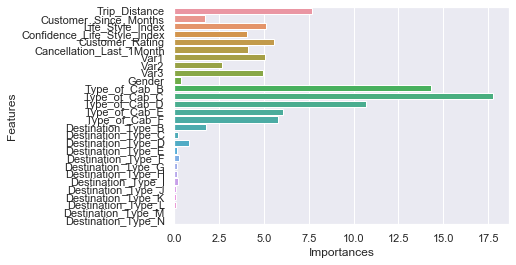

In [210]:
%%time

cat_oofs, cat_preds, feature_importance = cross_val(features, train_proc, test_proc, CatBoostClassifier(random_state = 1999), 'cat')
sns.barplot(x = 'Importances', y = 'Features', data = feature_importance)


*************************Fold 1*************************

Accuracy is: 0.7046671476854137

*************************Fold 2*************************

Accuracy is: 0.7057304522842062

*************************Fold 3*************************

Accuracy is: 0.7047698617651527

*************************Fold 4*************************

Accuracy is: 0.7043521190946377

*************************Fold 5*************************

Accuracy is: 0.7045420021266899

Accuracy is: 0.7048123224620619
Wall time: 28.4 s


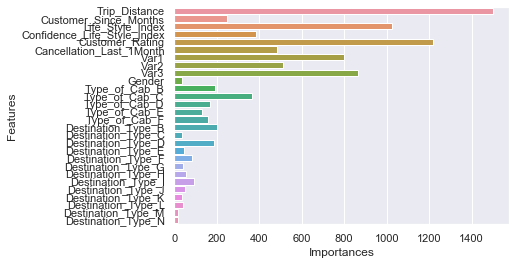

In [211]:
%%time

lgb_oofs, lgb_preds, feature_importance = cross_val(features, train_proc, test_proc, LGBMClassifier(random_state = 1999), 'lgb')
sns.barplot(x = 'Importances', y = 'Features', data = feature_importance)


*************************Fold 1*************************

Accuracy is: 0.7046671476854137

*************************Fold 2*************************

Accuracy is: 0.7057304522842062

*************************Fold 3*************************

Accuracy is: 0.7047698617651527

*************************Fold 4*************************

Accuracy is: 0.7043521190946377

*************************Fold 5*************************

Accuracy is: 0.7045420021266899

Accuracy is: 0.7048123224620619
Wall time: 29.9 s


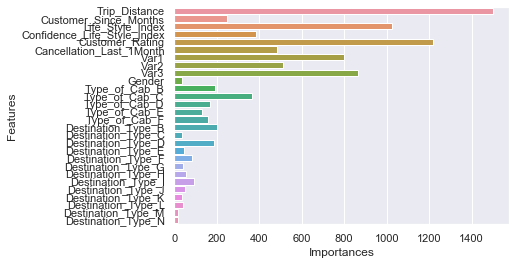

In [212]:
%%time

xgb_oofs, xgb_preds, feature_importance = cross_val(features, train_proc, test_proc, LGBMClassifier(random_state = 1999), 'xgb')
sns.barplot(x = 'Importances', y = 'Features', data = feature_importance)

In [221]:
train_new = train_proc[[target, id_col]].copy()
test_new = test_proc[[target, id_col]].copy()

train_new['cat'] = cat_oofs
test_new['cat'] = cat_preds

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

In [235]:
ens_features = ['cat', 'lgb']


*************************Fold 1*************************

Accuracy is: 0.7062621045836023

*************************Fold 2*************************

Accuracy is: 0.7063380549120875

*************************Fold 3*************************

Accuracy is: 0.7057192769254139

*************************Fold 4*************************

Accuracy is: 0.7056433237125931

*************************Fold 5*************************

Accuracy is: 0.704883791584384

Accuracy is: 0.705769318406222
Wall time: 17.6 s


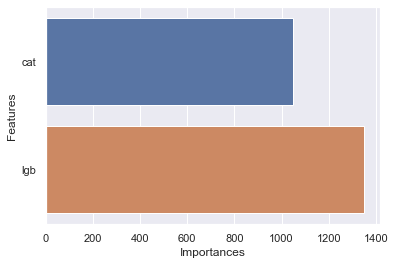

In [236]:
%%time

cat_oofs, cat_preds, feature_importance = cross_val(ens_features, train_new, test_new, LGBMClassifier(random_state = 1999), 'lgb')
sns.barplot(x = 'Importances', y = 'Features', data = feature_importance)

In [237]:
sample_sub[target] = cat_preds
sample_sub.to_csv(path+'\\Stacking.csv', index = False)